Importing the necessary modules.

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from IPython.display import HTML, display
from sklearn.utils import shuffle
from sklearn.ensemble import AdaBoostClassifier

The following step gets data in the form of a pandas dataframe from the spambase file. The data is then shuffled to ensure that the data gets evenly distributed.

In [2]:
rawdata = pd.read_csv('./spambase.data', header=None)
rawdata = shuffle(rawdata)

Let's get a glimpse of the data being read.

In [3]:
rawdata.head()

,0,1,2,3,4,5,6,7,8,9,...,48,49,50,51,52,53,54,55,56,57
2403,0.72,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.00,...,0.000,0.000,0.000,0.000,0.000,0.0,1.407,6,38,0
1752,0.00,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.00,...,0.000,0.375,0.525,0.225,0.000,0.0,4.906,39,211,1
1735,0.00,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.0,3.70,...,0.261,0.000,0.000,0.785,0.000,0.0,4.333,13,78,1
102,0.00,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.00,...,0.305,0.611,0.000,1.529,0.000,0.0,5.500,22,66,1
1961,0.06,0.0,0.19,0.0,0.06,0.06,0.0,0.0,0.0,0.13,...,0.009,0.152,0.000,0.047,0.028,0.0,1.948,23,836,0


To get an overall idea about the data let us see some properties of the data.

In [4]:
rawdata.describe()

,0,1,2,3,4,5,6,7,8,9,...,48,49,50,51,52,53,54,55,56,57
count,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,...,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000
mean,0.104553,0.213015,0.280656,0.065425,0.312223,0.095901,0.114208,0.105295,0.090067,0.239413,...,0.038575,0.139030,0.016976,0.269071,0.075811,0.044238,5.191515,52.172789,283.289285,0.394045
std,0.305358,1.290575,0.504143,1.395151,0.672513,0.273824,0.391441,0.401071,0.278616,0.644755,...,0.243471,0.270355,0.109394,0.815672,0.245882,0.429342,31.729449,194.891310,606.347851,0.488698
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.588000,6.000000,35.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.065000,0.000000,0.000000,0.000000,0.000000,2.276000,15.000000,95.000000,0.000000
75%,0.000000,0.000000,0.420000,0.000000,0.380000,0.000000,0.000000,0.000000,0.000000,0.160000,...,0.000000,0.188000,0.000000,0.315000,0.052000,0.000000,3.706000,43.000000,266.000000,1.000000
max,4.540000,14.280000,5.100000,42.810000,10.000000,5.880000,7.270000,11.110000,5.260000,18.180000,...,4.385000,9.752000,4.081000,32.478000,6.003000,19.829000,1102.500000,9989.000000,15841.000000,1.000000


Let's split the data into input vector and output.

In [5]:
x=np.array(rawdata.iloc[:,0:57])
y=np.array(rawdata.iloc[:,57])

Now to do kfold evaluation. Using number of splits to be 10.

In [6]:
kf = KFold(n_splits=10)
kf.get_n_splits(x)

10

To decide on the model to use for classification, let's plot each features with the output.

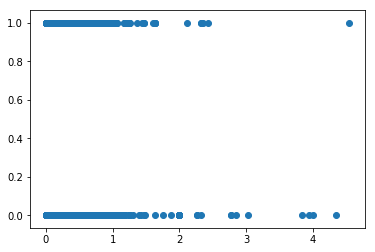

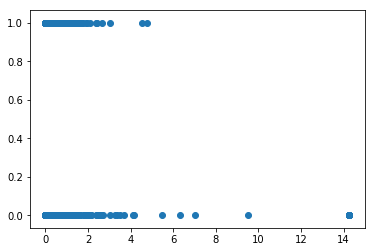

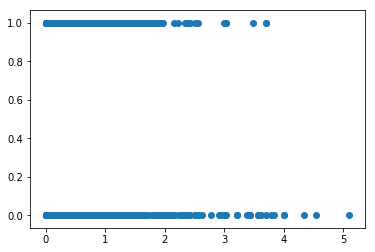

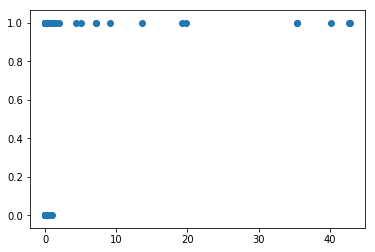

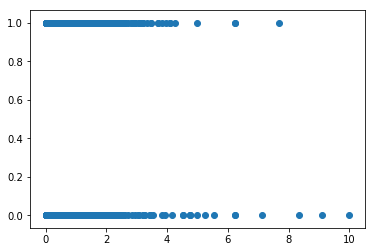

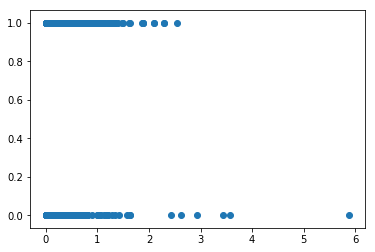

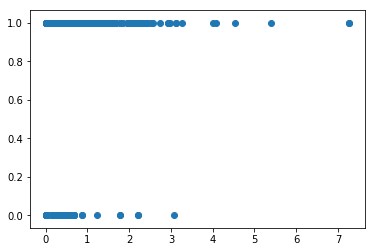

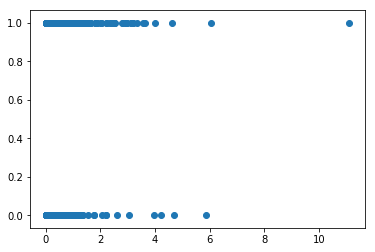

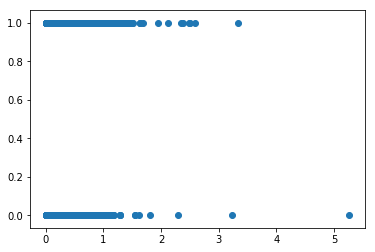

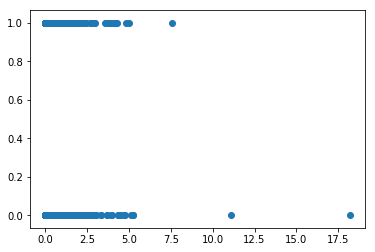

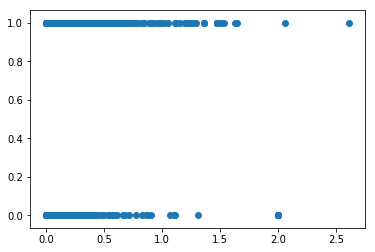

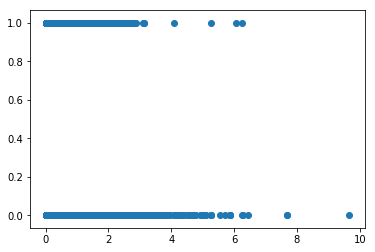

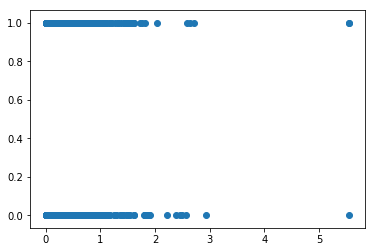

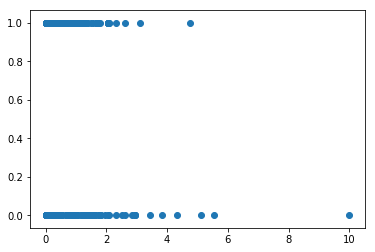

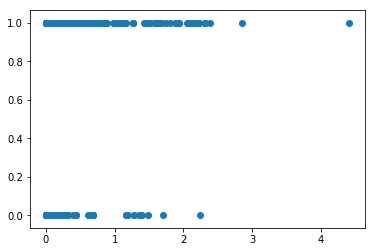

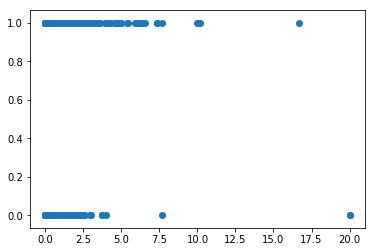

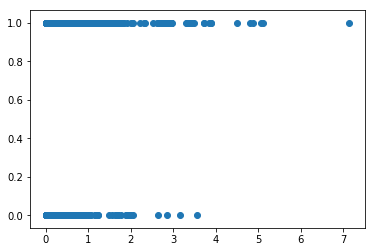

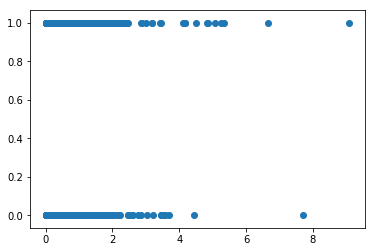

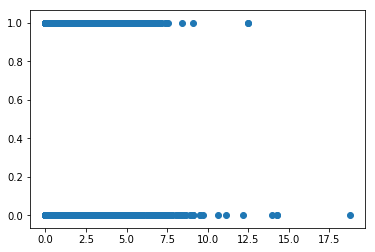

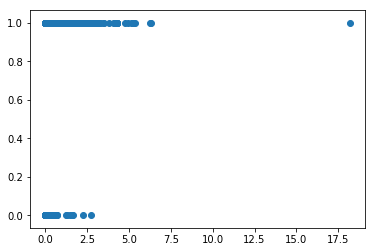

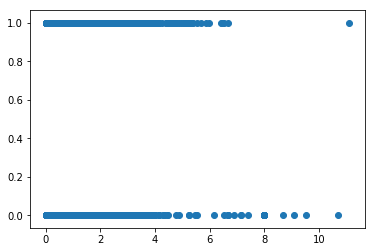

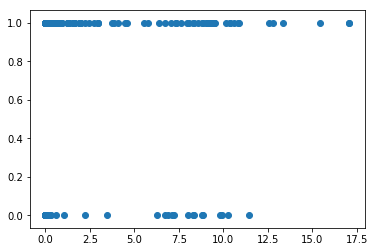

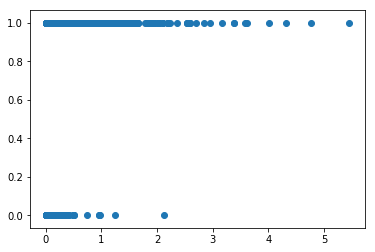

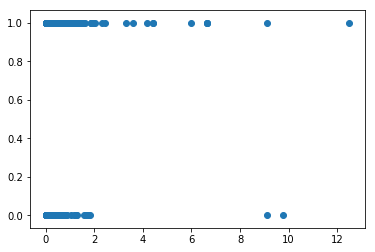

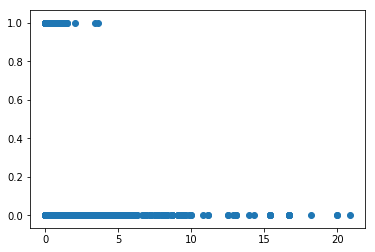

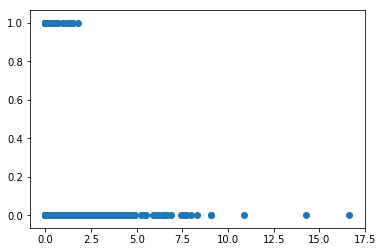

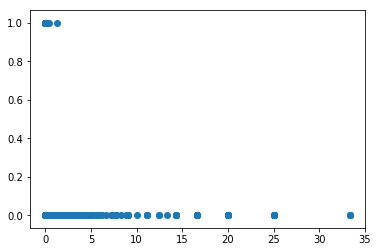

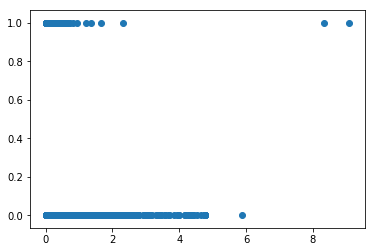

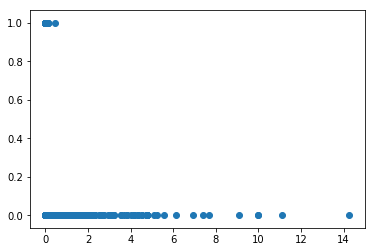

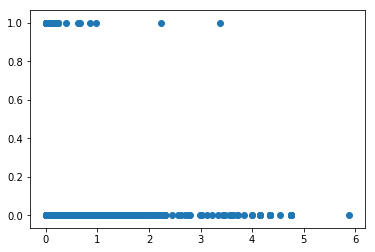

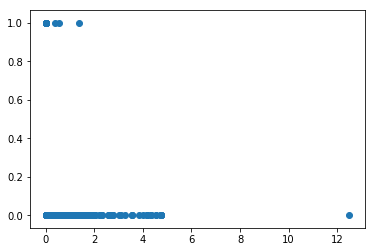

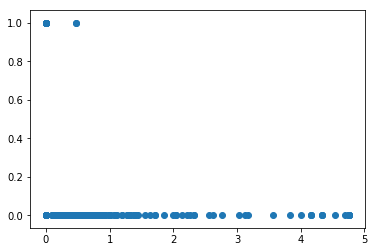

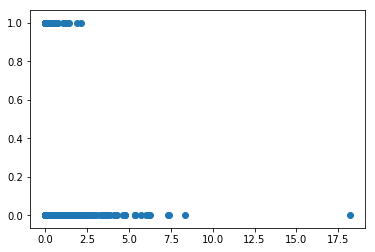

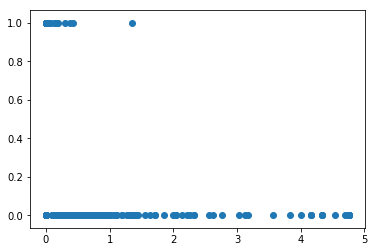

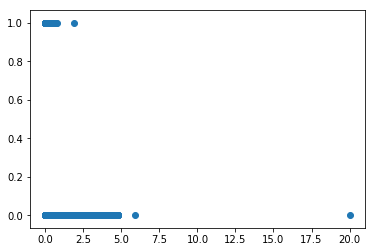

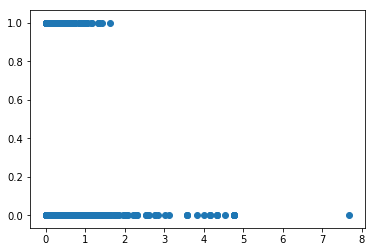

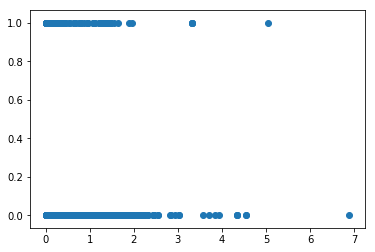

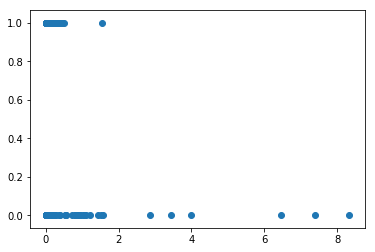

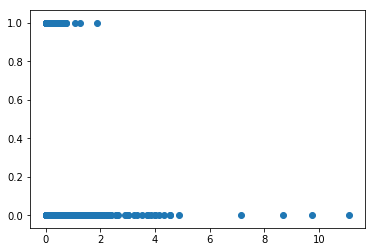

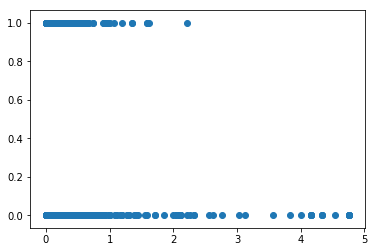

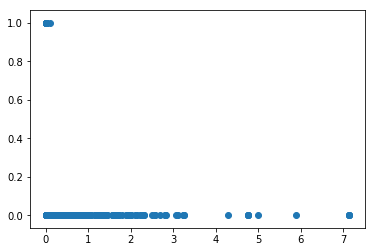

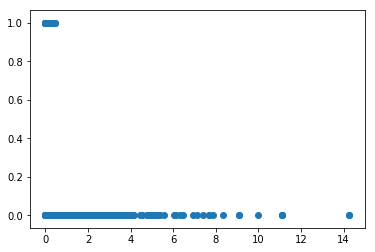

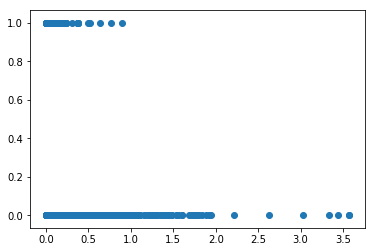

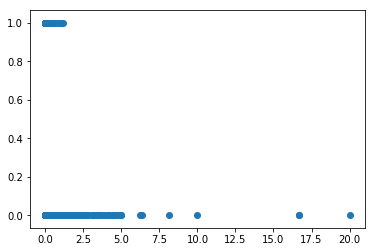

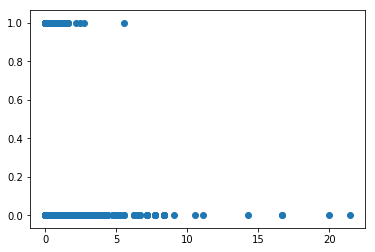

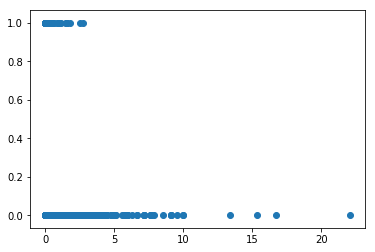

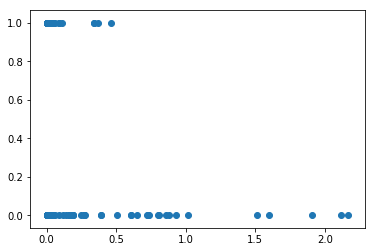

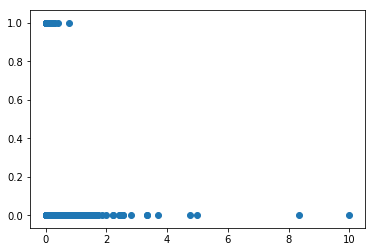

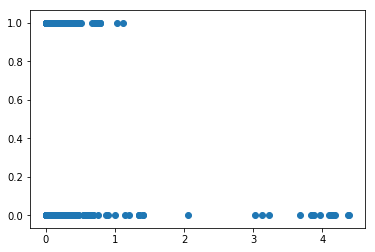

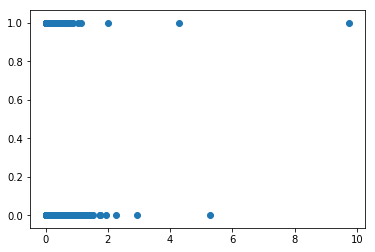

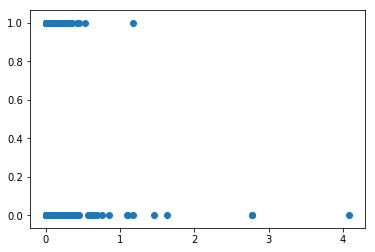

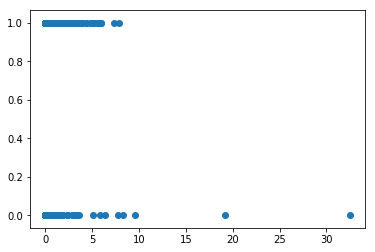

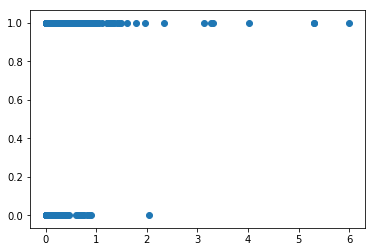

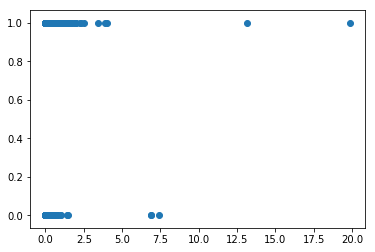

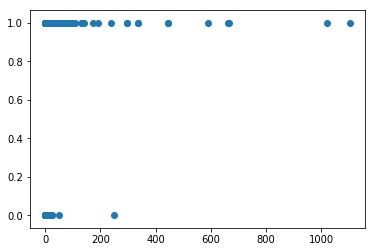

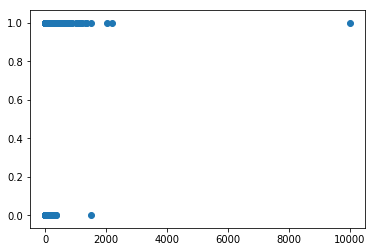

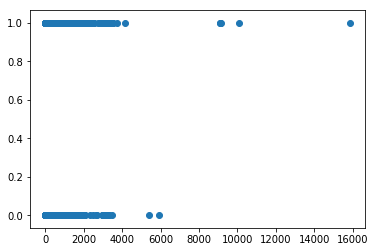

In [7]:
for i in range(57):
   plt.scatter(x[:,i],y)
   plt.show()

It's seen that some variables are somewhat linearly separable. There is not a clear rule that can be identified from the diagrams. But we can infer that if we use SVM or logistic regression, we might not get a very accurate model, hence can be used as a weak learner. Therefore, I am using AdaBoost for this classification task.

Let us train the data. 

I am embedding some HTML code with the following code to make the table. 

In [8]:
string='<table><tr><th> Fold# </th><th> false positive </th><th> false negative </th><th> overall </th></tr>'
svc = AdaBoostClassifier(n_estimators=60,learning_rate=1)
fold=0
fp_overall,fn_overall,e_overall,total_overall=0,0,0,0#Variables for getting the overall error rates.
for train_index, test_index in kf.split(x):#Iterate through the folds.
        fold=fold+1
        X_train, X_test = x[train_index], x[test_index]
        y_train, y_test = y[train_index], y[test_index]
        svc.fit(X_train, y_train)#Train the model.
        fp,fn,e,total=0,0,0,0#fp:false positives, fn: false negatives, e: Number of error cases, total: Number of test cases.
        for i,j in zip(X_test,y_test):
            prediction=svc.predict([i])[0]#Predict using the trained model.
            if prediction!=j:#If prediction is wrong, identify the type of error and act accordingly.
                e=e+1
                if prediction==0 and j==1:
                    fn=fn+1#Incrementing false negatives.
                else:
                    fp=fp+1#Incrementing false positives.
            total=total+1
        fn_overall=fn_overall+fn#Updating the overall false negatives till now.
        fp_overall=fp_overall+fp#Updating the overall false positives till now.
        e_overall=e_overall+e#Updating the overall error.
        total_overall=total_overall+total#Total number of test done till now.
        print("Fold #"+str(fold)+" done.")
        string=string+'<tr><td>'+str(fold)+'</td><td>'+str((fp/total)*100.0)+'</td><td>'+str((fn/total)*100.0)+'</td><td>'+str(((e)/total)*100.0)+'<td></td></tr>'
string=string+'<tr><td>Overall</td><td>'+str((fp_overall/total_overall)*100.0)+'</td><td>'+str((fn_overall/total_overall)*100.0)+'</td><td>'+str(((e_overall)/total_overall)*100.0)+'<td></td></tr>'
string=string+'</table>'   
print("All the folds are done.")


Fold #1 done.
Fold #2 done.
Fold #3 done.
Fold #4 done.
Fold #5 done.
Fold #6 done.
Fold #7 done.
Fold #8 done.
Fold #9 done.
Fold #10 done.
All the folds are done.


Now let us display the results in tabular format.

In [9]:
display(HTML(string))

Fold#,false positive,false negative,overall
1,3.2537960954446854,1.735357917570499,4.989154013015185
2,1.956521739130435,1.956521739130435,3.91304347826087
3,2.608695652173913,5.0,7.608695652173914
4,2.8260869565217392,2.608695652173913,5.434782608695652
5,1.7391304347826086,4.3478260869565215,6.086956521739131
6,3.260869565217391,3.4782608695652173,6.739130434782608
7,3.6956521739130435,3.0434782608695654,6.739130434782608
8,2.608695652173913,3.260869565217391,5.869565217391305
9,3.4782608695652173,2.608695652173913,6.086956521739131
10,2.8260869565217392,2.391304347826087,5.217391304347826
